# How to constrain stellar parameters...

Things we usually have available:
 * multi-band photometry (e.g. APASS, 2MASS, WISE, etc).
 * Gaia parallax
 * Gaia teff and logg for spectral fit.
 * Nearby 2MASS Gaia sources (e.g. sum gives contamination)
 * Spectra scraped from exofop
 * first-order stellar parameter estimates in input catalogue (also on exofop)

Let's use Dan Huber's IsoClassify to combine all this (although I rewrote this a few years ago to include LogLikelihoods, so maybe we should use that instead?)

Functions we'll need:
* Scrape Gaia parallax and Teff/Logg given RA/Dec
* Scrape APAS B/V colours given RA/Dec
* Scrape 2MASS JHK colours given RA/Dec (from Gaia X-match?)
* Scrape WISE colours given RA/Dec (from Gaia X-match?)
* Scrape stellar param estimate and possible spectra from exofop
* Some way to combine these and run on isoclassify

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
import dustmaps

In [4]:
from isoclassify.isoclassify import classify

# Scrape Gaia Parallax, etc:

In [6]:
import starpars
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'isoclassify.grid'

In [11]:
icid=211945201;mission='k2'
exofop_dat=GetExoFop(icid,mission)
sc=SkyCoord(exofop_dat.RA.split(' ')[0],exofop_dat.Dec.split(' ')[0],unit=(u.hour,u.deg))
survey_dat=QueryGaiaAndSurveys(sc)

MAGNITUDES
STELLAR PA
Parameter
Teff
logg
Radius
FeH
Distance
Mass
Density
Teff
logg
Radius
FeH
Distance
Mass
Density
Teff
logg
INFO: Query finished. [astroquery.utils.tap.core]
https://www.aavso.org/cgi-bin/apass_dr10_download.pl?ra=136.5740&dec=19.4023&radius=0.0042&output=csv
Querying catalogues. 0 of 1
b'Gaia DR2 636363799347569408' <desig, id> 636363799347569408
(96,)
RA (deg)           136.574183
RA err (")           0.116000
Dec (deg)           19.402117
Dec err (")          0.064000
Johnson V (V)       10.169000
Verr                 0.054000
Vnobs                6.000000
Johnson B (B)       10.727000
Berr                 0.029000
Bnobs                6.000000
Sloan u' (SU)             NaN
SUerr                     NaN
SUnobs               0.000000
Sloan g' (SG)       10.540000
SGerr                0.115000
SGnobs               5.000000
Sloan r' (SR)       10.058000
SRerr                0.025000
SRnobs               4.000000
Sloan i' (SI)       10.055000
SIerr                0.0

In [11]:
survey_dat.index[:90]

Index(['2m_angular_distance', '2m_dec_2', '2m_err_maj', '2m_err_min',
       '2m_ext_key', '2m_h_m', '2m_h_msigcom', '2m_j_date', '2m_j_m',
       '2m_j_msigcom', '2m_ks_m', '2m_ks_msigcom', '2m_original_ext_source_id',
       '2m_ph_qual', '2m_ra_2', '2m_tmass_oid', 'a_g_percentile_lower',
       'a_g_percentile_upper', 'a_g_val', 'ap_Berr', 'ap_Dec (deg)',
       'ap_Dec err (")', 'ap_Johnson B (B)', 'ap_Johnson V (V)',
       'ap_PanSTARRS Y (Y)', 'ap_RA (deg)', 'ap_RA err (")', 'ap_SGerr',
       'ap_SIerr', 'ap_SRerr', 'ap_SRnobs', 'ap_SUerr', 'ap_SZerr',
       'ap_Sloan g' (SG)', 'ap_Sloan i' (SI)', 'ap_Sloan r' (SR)',
       'ap_Sloan u' (SU)', 'ap_Sloan z' (SZ)', 'ap_Verr', 'ap_Vnobs',
       'ap_Yerr', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_gof_al', 'astrometric_matched_observations',
       'astrometric_n_bad_obs_al', 'astrometric_n_good_obs_al',
       'astrometric_n_obs_al', 'astrometric_params_solved',
       'astrometric_primary_flag', 'as

In [27]:
if 'a_g_val' in survey_dat.index and survey_dat['a_g_val'] is not None:
    av=survey_dat['a_g_val']
else:
    av=-99

In [63]:
dustmodel,ext = LoadDust(sc,survey_dat.parallax,dust='allsky')
#input, model, dustmodel=0, plot=1, useav=-99.0, ext=-99.0
paras=classify.classify(input=x, model=mod, dustmodel=dustmodel, ext=ext,plot=1)

<class 'dict'>
lum 11125
number of models used within non-phot obsconstraints: 11125
number of models incl reddening: 11125
number of models after phot constraints: 0
----


In [55]:
out

In [51]:
ext['av']*np.interp(x=np.arange(10),xp=np.random.random()+1.2*np.arange(10),fp=np.random.random()+1.2*np.arange(10))

array([ 1.88400119,  2.18739402,  5.29458702,  8.40178002, 11.50897302,
       14.61616602, 17.72335902, 20.83055202, 23.93774502, 27.04493802])

In [42]:
from isoclassify.isoclassify import pipeline

In [23]:
survey_dat.index[90:180]#

Index(['phot_g_mean_flux_error', 'phot_g_mean_flux_over_error',
       'phot_g_mean_mag', 'phot_g_n_obs', 'phot_rp_mean_flux',
       'phot_rp_mean_flux_error', 'phot_rp_mean_flux_over_error',
       'phot_rp_mean_mag', 'phot_variable_flag', 'pmdec', 'pmdec_error',
       'pmra', 'pmra_error', 'pmra_pmdec_corr', 'priam_flags', 'ra',
       'ra_dec_corr', 'ra_error', 'ra_parallax_corr', 'ra_pmdec_corr',
       'ra_pmra_corr', 'radial_velocity', 'radial_velocity_error',
       'radius_percentile_lower', 'radius_percentile_upper', 'radius_val',
       'random_index', 'ref_epoch', 'rv_nb_transits', 'rv_template_logg',
       'rv_template_teff', 'sd_angular_distance', 'sd_dec_2', 'sd_dec_error_2',
       'sd_g_mag', 'sd_g_mag_error', 'sd_i_mag', 'sd_i_mag_error', 'sd_mjd',
       'sd_objc_type', 'sd_original_ext_source_id', 'sd_r_mag',
       'sd_r_mag_error', 'sd_ra_2', 'sd_ra_error_2', 'sd_sdssdr9_oid',
       'sd_thing_id', 'sd_u_mag', 'sd_u_mag_error', 'sd_z_mag',
       'sd_z_mag_error

In [43]:
x=classify.obsdata()

x.addcoords(sc.ra.deg,sc.dec.deg)

if 'parallax' in survey_dat.index and survey_dat.parallax is not None:
    #Adding parallax from Gaia
    x.addplx(survey_dat.parallax,survey_dat.parallax_error)

if 'lum_val' in survey_dat.index and survey_dat.lum_val is not None:
    #Adding luminosity from Gaia
    x.addlum([survey_dat.lum_val],[0.5*(survey_dat.lum_percentile_upper-survey_dat.lum_percentile_lower)])

if 'ap_Johnson B (B)' in survey_dat.index and survey_dat['ap_Johnson B (B)'] is not None:
    #BV photometry (eg apass)
    x.addbv([survey_dat['ap_Johnson B (B)'],survey_dat['ap_Johnson V (V)']],
            [survey_dat['ap_Berr'],survey_dat['ap_Verr']])
elif 'B' in exofop_dat.index:
    x.addbv([exofop_dat['B'],exofop_dat['V']],
            [exofop_dat['B_err'],exofop_dat['V_err']])

if '2m_ks_m' in survey_dat.index and survey_dat['2m_ks_m'] is not None:
    # 2MASS photometry
    x.addjhk([survey_dat['2m_j_m'],survey_dat['2m_h_m'],survey_dat['2m_ks_m']],
             [survey_dat['2m_j_msigcom'],survey_dat['2m_h_msigcom'],survey_dat['2m_ks_msigcom']])
elif 'K' in exofop_dat.index:
    x.addjhk([exofop_dat['J'],exofop_dat['H'],exofop_dat['K']],
             [exofop_dat['J_err'],exofop_dat['H_err'],exofop_dat['K_err']])

if "ap_Sloan z' (SZ)" in survey_dat.index and survey_dat["ap_Sloan z' (SZ)"] is not None:
    # 2MASS photometry
    x.addgriz([survey_dat["ap_Sloan g' (SG)"],survey_dat["ap_Sloan r' (SR)"],
               survey_dat["ap_Sloan i' (SI)"],survey_dat["ap_Sloan z' (SZ)"]],
             [survey_dat["ap_SGerr"],survey_dat["ap_SRerr"],survey_dat["ap_SIerr"],survey_dat["ap_SZerr"]])
elif 'sd_z_mag' in survey_dat.index and survey_dat["sd_z_mag"] is not None:
    x.addgriz([survey_dat['sd_g_mag'],survey_dat['sd_r_mag'],survey_dat['sd_i_mag'],survey_dat['sd_z_mag']],
             [survey_dat['sd_g_mag_error'],survey_dat['sd_r_mag_error'],survey_dat['sd_i_mag_error'],survey_dat['sd_z_mag_error']])
elif 'z' in exofop_dat.index:
    x.addgriz([exofop_dat['g'],exofop_dat['r'],exofop_dat['i'],exofop_dat['z']],
              [exofop_dat['g_err'],exofop_dat['r_err'],exofop_dat['i_err'],exofop_dat['z_err']])

import mwdust
av=mwdust.SFD()(sc.galactic.l.deg,sc.galactic.b.deg,1000.0/survey_dat.parallax)#sfdmap(sc.ra.deg.to_string(),sc.dec.deg.to_string())

mod=LoadModel()
allparas, prob, figs = classify.classify(input=x, model=mod, dustmodel=0,useav=av)


lum 11125
number of models used within non-phot obsconstraints: 11125


TypeError: 'float' object is not subscriptable

In [22]:
classify.classify?

In [21]:
os.path.isfile('/Users/hosborn/anaconda3/lib/python3.6/site-packages/isoclassify_hpo/mesa.ebf')

True

In [16]:
x.lum

2.340893268585205

number of models used within non-phot obsconstraints: 3357618
number of models incl reddening: 3357618
Getting Teff from colours
B-V colour:0.5579999999999998±0.06129437168288782.  556494  intersection: [3357618       0  556494]
g-r colour:0.4819999999999993±0.1176860229593982.  1009809  intersection: [3357618       0  556494 1009809]
r-i colour:0.0030000000000001137±0.025079872407968908.  253516  intersection: [3357618       0  556494 1009809  253516]
number of models after phot constraints: 197183
----
maxprob: 1970781705.776864
sumprob: 1970781725.604732
maxprob: -19.82786798477173
teff 6412.322573034907 403.42313025196654 390.27275275327247
logg 4.110652437447822 0.1997509467706058 0.3008218271321117
feh -0.005228424612906825 0.15499403858183577 0.1726882034165481
rad 1.6165404160479324 0.9361424704015937 0.4233587728885506
mass 1.3257699806337861 0.3345583286568008 0.2351676127565736
rho 0.28004207907276635 0.31156535125027274 0.19030577796908604
lum 4.224444580711134 6.5315184419

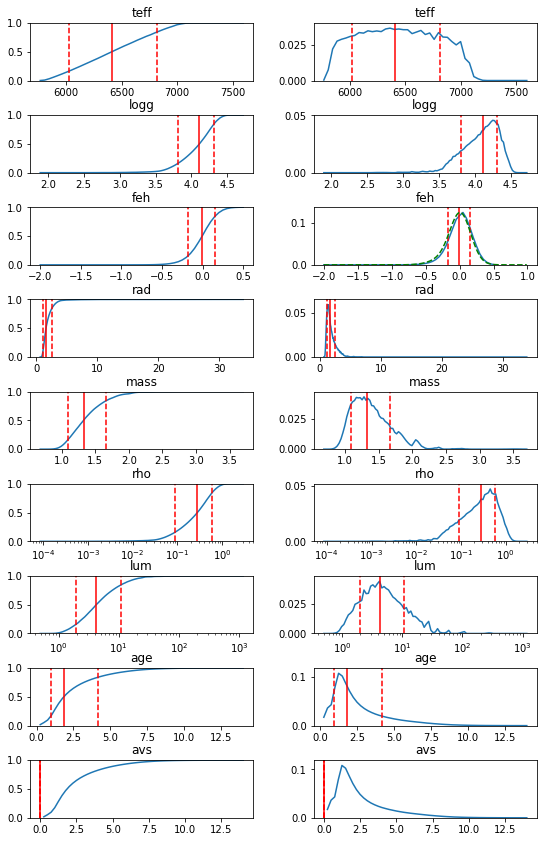

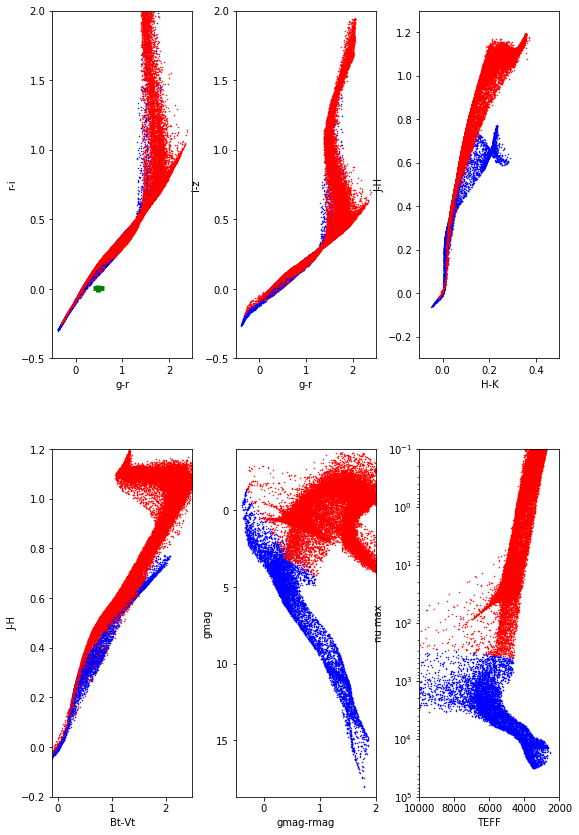

In [32]:
x=classify_grid.obsdata()

x.addcoords(sc.ra.deg,sc.dec.deg)

if 'parallax' in survey_dat.index and survey_dat.parallax is not None:
    x.addplx(survey_dat.parallax,survey_dat.parallax_error)

if 'ap_Johnson B (B)' in survey_dat.index and survey_dat['ap_Johnson B (B)'] is not None:
    #BV photometry (eg apass)
    x.addbv([survey_dat['ap_Johnson B (B)'],survey_dat['ap_Johnson V (V)']],
            [survey_dat['ap_Berr'],survey_dat['ap_Verr']])
elif 'B' in exofop_dat.index:
    x.addbv([exofop_dat['B'],exofop_dat['V']],
            [exofop_dat['B_err'],exofop_dat['V_err']])

if "ap_Sloan z' (SZ)" in survey_dat.index and survey_dat["ap_Sloan z' (SZ)"] is not None:
    # 2MASS photometry
    x.addgriz([survey_dat["ap_Sloan g' (SG)"],survey_dat["ap_Sloan r' (SR)"],
               survey_dat["ap_Sloan i' (SI)"],survey_dat["ap_Sloan z' (SZ)"]],
             [survey_dat["ap_SGerr"],survey_dat["ap_SRerr"],survey_dat["ap_SIerr"],survey_dat["ap_SZerr"]])
elif 'sd_z_mag' in survey_dat.index and survey_dat["sd_z_mag"] is not None:
    x.addgriz([survey_dat['sd_g_mag'],survey_dat['sd_r_mag'],survey_dat['sd_i_mag'],survey_dat['sd_z_mag']],
             [survey_dat['sd_g_mag_error'],survey_dat['sd_r_mag_error'],survey_dat['sd_i_mag_error'],survey_dat['sd_z_mag_error']])
elif 'z' in exofop_dat.index:
    x.addgriz([exofop_dat['g'],exofop_dat['r'],exofop_dat['i'],exofop_dat['z']],
              [exofop_dat['g_err'],exofop_dat['r_err'],exofop_dat['i_err'],exofop_dat['z_err']])

import mwdust
av=mwdust.SFD()(sc.galactic.l.deg,sc.galactic.b.deg,1000.0/survey_dat.parallax)#sfdmap(sc.ra.deg.to_string(),sc.dec.deg.to_string())

mod=LoadModel()
no2m_paras, prob, figs = classify_grid.classify(input=x, model=mod, dustmodel=0,useav=av)


number of models used within non-phot obsconstraints: 3357618
number of models incl reddening: 3357618
Getting Teff from colours
B-V colour:0.5579999999999998±0.06129437168288782.  556494  intersection: [3357618       0  556494]
J-H colour:0.23600006103515625±0.03623534256020402.  341010  intersection: [3357618       0  556494  341010]
H-K colour:0.0710000991821289±0.03440930151162007.  2426473  intersection: [3357618       0  556494  341010 2426473]
number of models after phot constraints: 284357
----
maxprob: 2841965828.788515
sumprob: 2841965848.067781
maxprob: -19.279265880584717
teff 6184.614804833701 501.73425126454185 442.53431893308243
logg 4.1473498307701195 0.21362444839246653 0.314842174418712
feh -0.003191215253431502 0.15616767592503455 0.17185585111070698
rad 1.4901401400274235 0.917367779430865 0.4224810626464619
mass 1.217659194473724 0.3661412515250506 0.2336508670948283
rho 0.3298657581847334 0.41244430267002496 0.22961215782116895
lum 3.166464084473938 5.726319049781

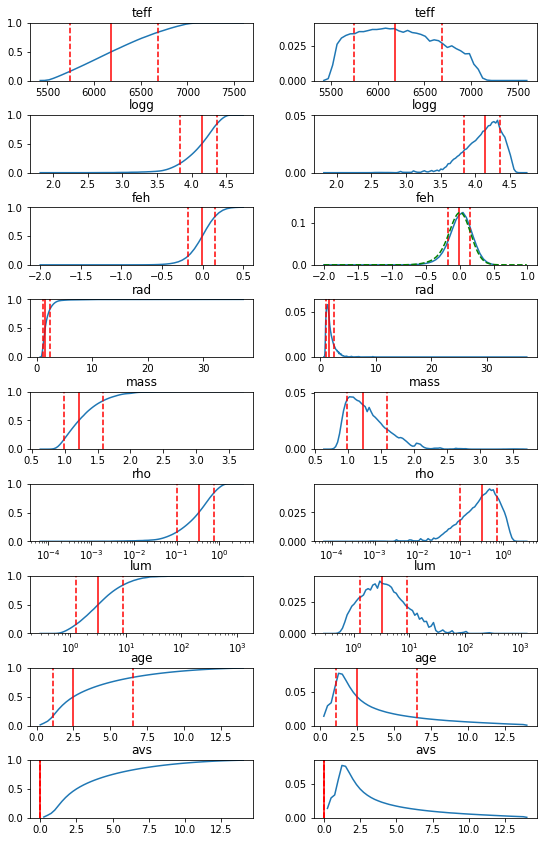

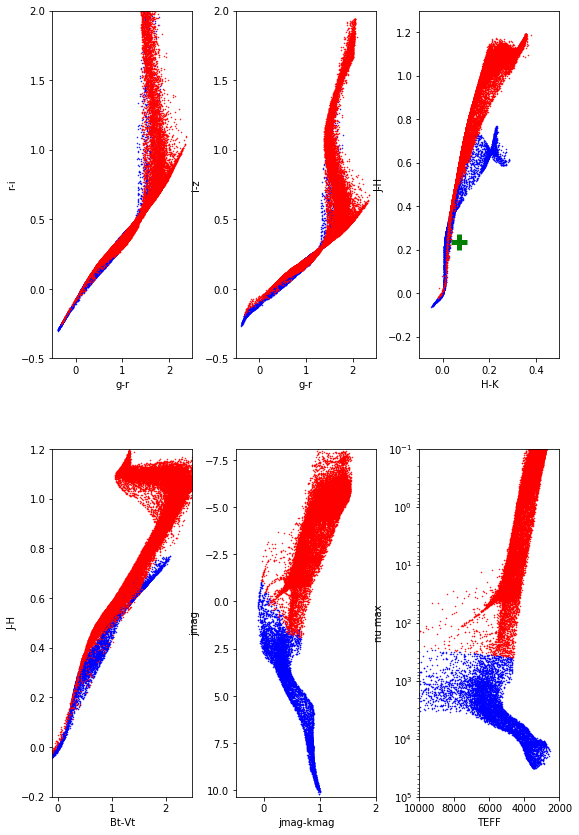

In [33]:
x=classify_grid.obsdata()

x.addcoords(sc.ra.deg,sc.dec.deg)

if 'parallax' in survey_dat.index and survey_dat.parallax is not None:
    x.addplx(survey_dat.parallax,survey_dat.parallax_error)

if 'ap_Johnson B (B)' in survey_dat.index and survey_dat['ap_Johnson B (B)'] is not None:
    #BV photometry (eg apass)
    x.addbv([survey_dat['ap_Johnson B (B)'],survey_dat['ap_Johnson V (V)']],
            [survey_dat['ap_Berr'],survey_dat['ap_Verr']])
elif 'B' in exofop_dat.index:
    x.addbv([exofop_dat['B'],exofop_dat['V']],
            [exofop_dat['B_err'],exofop_dat['V_err']])

if '2m_ks_m' in survey_dat.index and survey_dat['2m_ks_m'] is not None:
    # 2MASS photometry
    x.addjhk([survey_dat['2m_j_m'],survey_dat['2m_h_m'],survey_dat['2m_ks_m']],
             [survey_dat['2m_j_msigcom'],survey_dat['2m_h_msigcom'],survey_dat['2m_ks_msigcom']])
elif 'K' in exofop_dat.index:
    x.addjhk([exofop_dat['J'],exofop_dat['H'],exofop_dat['K']],
             [exofop_dat['J_err'],exofop_dat['H_err'],exofop_dat['K_err']])

import mwdust
av=mwdust.SFD()(sc.galactic.l.deg,sc.galactic.b.deg,1000.0/survey_dat.parallax)#sfdmap(sc.ra.deg.to_string(),sc.dec.deg.to_string())

mod=LoadModel()
nogriz_paras, prob, figs = classify_grid.classify(input=x, model=mod, dustmodel=0,useav=av)

number of models used within non-phot obsconstraints: 3357618
number of models incl reddening: 3357618
Getting Teff from colours
g-r colour:0.4819999999999993±0.1176860229593982.  1009809  intersection: [3357618       0 1009809]
r-i colour:0.0030000000000001137±0.025079872407968908.  253516  intersection: [3357618       0 1009809  253516]
J-H colour:0.23600006103515625±0.03623534256020402.  341010  intersection: [3357618       0 1009809  253516  341010]
H-K colour:0.0710000991821289±0.03440930151162007.  2426473  intersection: [3357618       0 1009809  253516  341010 2426473]
number of models after phot constraints: 245118
----
maxprob: 2449546967.463325
sumprob: 2449546989.2017055
maxprob: -21.738380432128906
teff 6445.594172662567 659.6612768802324 444.9513375730139
logg 4.097082066350645 0.20547222091589568 0.3136824604036774
feh -0.010646611922180985 0.15656845380028078 0.17250977466259027
rad 1.6673497756311952 1.024615027794258 0.466515486839995
mass 1.3631044941152006 0.38901511

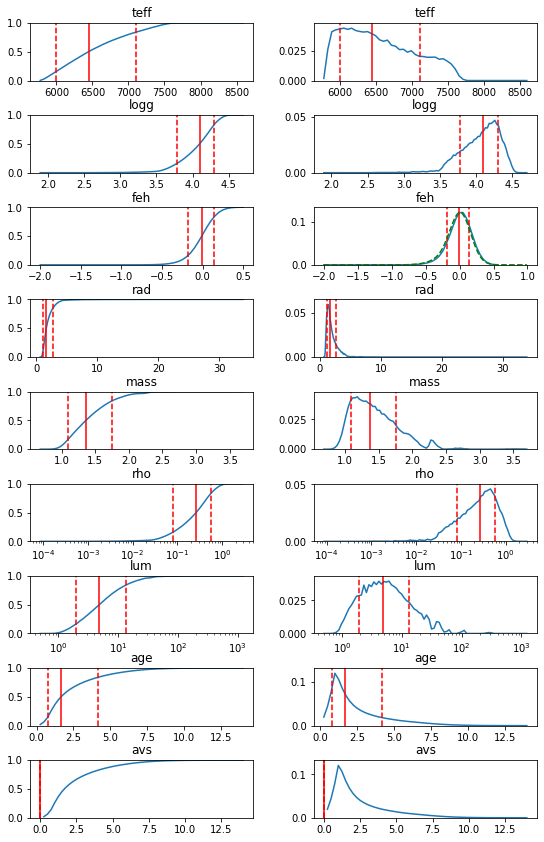

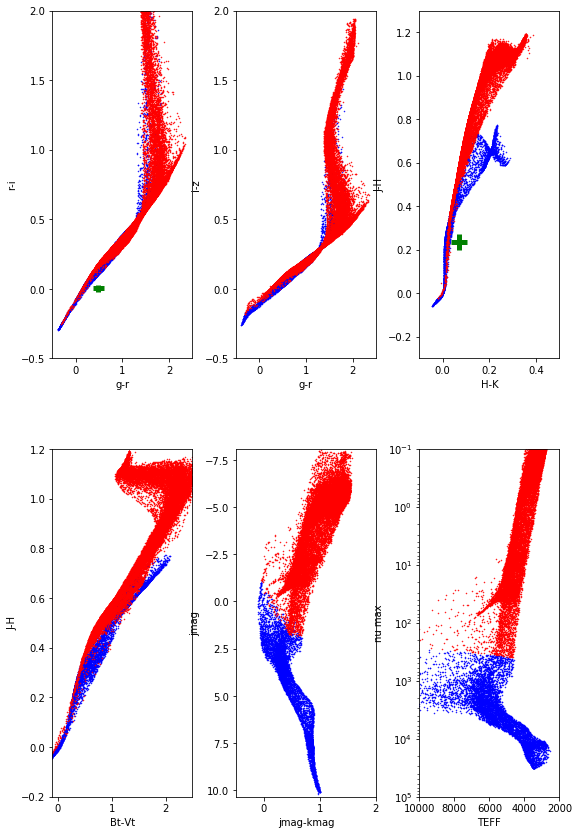

In [34]:
x=classify_grid.obsdata()

x.addcoords(sc.ra.deg,sc.dec.deg)

if 'parallax' in survey_dat.index and survey_dat.parallax is not None:
    x.addplx(survey_dat.parallax,survey_dat.parallax_error)
    
if 'lum_val' in survey_dat.index and survey_dat.lum_val is not None:
    x.addlum(survey_dat.lum_val,0.5*(survey_dat.lum_percentile_upper-survey_dat.lum_percentile_lower)):

if '2m_ks_m' in survey_dat.index and survey_dat['2m_ks_m'] is not None:
    # 2MASS photometry
    x.addjhk([survey_dat['2m_j_m'],survey_dat['2m_h_m'],survey_dat['2m_ks_m']],
             [survey_dat['2m_j_msigcom'],survey_dat['2m_h_msigcom'],survey_dat['2m_ks_msigcom']])
elif 'K' in exofop_dat.index:
    x.addjhk([exofop_dat['J'],exofop_dat['H'],exofop_dat['K']],
             [exofop_dat['J_err'],exofop_dat['H_err'],exofop_dat['K_err']])


if "ap_Sloan z' (SZ)" in survey_dat.index and survey_dat["ap_Sloan z' (SZ)"] is not None:
    # 2MASS photometry
    x.addgriz([survey_dat["ap_Sloan g' (SG)"],survey_dat["ap_Sloan r' (SR)"],
               survey_dat["ap_Sloan i' (SI)"],survey_dat["ap_Sloan z' (SZ)"]],
             [survey_dat["ap_SGerr"],survey_dat["ap_SRerr"],survey_dat["ap_SIerr"],survey_dat["ap_SZerr"]])
elif 'sd_z_mag' in survey_dat.index and survey_dat["sd_z_mag"] is not None:
    x.addgriz([survey_dat['sd_g_mag'],survey_dat['sd_r_mag'],survey_dat['sd_i_mag'],survey_dat['sd_z_mag']],
             [survey_dat['sd_g_mag_error'],survey_dat['sd_r_mag_error'],survey_dat['sd_i_mag_error'],survey_dat['sd_z_mag_error']])
elif 'z' in exofop_dat.index:
    x.addgriz([exofop_dat['g'],exofop_dat['r'],exofop_dat['i'],exofop_dat['z']],
              [exofop_dat['g_err'],exofop_dat['r_err'],exofop_dat['i_err'],exofop_dat['z_err']])

import mwdust
av=mwdust.SFD()(sc.galactic.l.deg,sc.galactic.b.deg,1000.0/survey_dat.parallax)#sfdmap(sc.ra.deg.to_string(),sc.dec.deg.to_string())

mod=LoadModel()
noBV_paras, prob, figs = classify_grid.classify(input=x, model=mod, dustmodel=0,useav=av)



In [42]:
survey_dat.iloc[60:120]

dec_parallax_corr                                  -0.00658968
dec_pmdec_corr                                       -0.549667
dec_pmra_corr                                         0.140222
designation                     b'Gaia DR2 636363799347569408'
e_bp_min_rp_percentile_lower                            0.0627
e_bp_min_rp_percentile_upper                            0.2297
e_bp_min_rp_val                                          0.138
ecl_lat                                                2.68664
ecl_lon                                                133.297
epoch_photometry_url                                       NaN
flame_flags                                             200111
g_rp                                                  0.424011
l                                                      208.782
lum_percentile_lower                                   2.31646
lum_percentile_upper                                   2.36532
lum_val                                                

In [38]:
col_names=['teff','logg','feh','rad','mass','rho','lum','avs','dis']
for c in col_names:
    pardic={'all   ':allparas,'nogriz':nogriz_paras,'noBV  ':noBV_paras,'no2m  ':no2m_paras}
    for para in pardic:
        exec('print(c,para,pardic[para].'+c+',\'+\',pardic[para].'+c+'ep,\'-\',pardic[para].'+c+'em)')

#R=1.485 ± 0.357
#M=1.335 ± 0.183
#T=6320 ± 300
#logg=4.219 ± 0.152

teff all    6322.525948850944 + 430.03149560033853 - 352.43228688400995
teff nogriz 6184.614804833701 + 501.73425126454185 - 442.53431893308243
teff noBV   6445.594172662567 + 659.6612768802324 - 444.9513375730139
teff no2m   6412.322573034907 + 403.42313025196654 - 390.27275275327247
logg all    4.11948900717584 + 0.20286099525121948 - 0.3033356166643957
logg nogriz 4.1473498307701195 + 0.21362444839246653 - 0.314842174418712
logg noBV   4.097082066350645 + 0.20547222091589568 - 0.3136824604036774
logg no2m   4.110652437447822 + 0.1997509467706058 - 0.3008218271321117
feh all    -0.004507224970087743 + 0.15557979749975376 - 0.17302176955473794
feh nogriz -0.003191215253431502 + 0.15616767592503455 - 0.17185585111070698
feh noBV   -0.010646611922180985 + 0.15656845380028078 - 0.17250977466259027
feh no2m   -0.005228424612906825 + 0.15499403858183577 - 0.1726882034165481
rad all    1.5784293296199394 + 0.9323050694103154 - 0.4171010612549497
rad nogriz 1.4901401400274235 + 0.91736777943

number of models used within non-phot obsconstraints: 3357618
number of models incl reddening: 3357618
Getting Teff from colours
B-V colour:0.5579999999999998±0.06129437168288782.  556494  intersection: [3357618       0  556494]
g-r colour:0.4819999999999993±0.1176860229593982.  1009809  intersection: [3357618       0  556494 1009809]
r-i colour:0.0030000000000001137±0.025079872407968908.  253516  intersection: [3357618       0  556494 1009809  253516]
J-H colour:0.23600006103515625±0.03623534256020402.  341010  intersection: [3357618       0  556494 1009809  253516  341010]
H-K colour:0.0710000991821289±0.03440930151162007.  2426473  intersection: [3357618       0  556494 1009809  253516  341010 2426473]
number of models after phot constraints: 197183
----
maxprob: 1969896545.7249064
sumprob: 1969896565.4907234
maxprob: -19.765816926956177
teff 6322.525948850944 430.03149560033853 352.43228688400995
logg 4.11948900717584 0.20286099525121948 0.3033356166643957
feh -0.004507224970087743

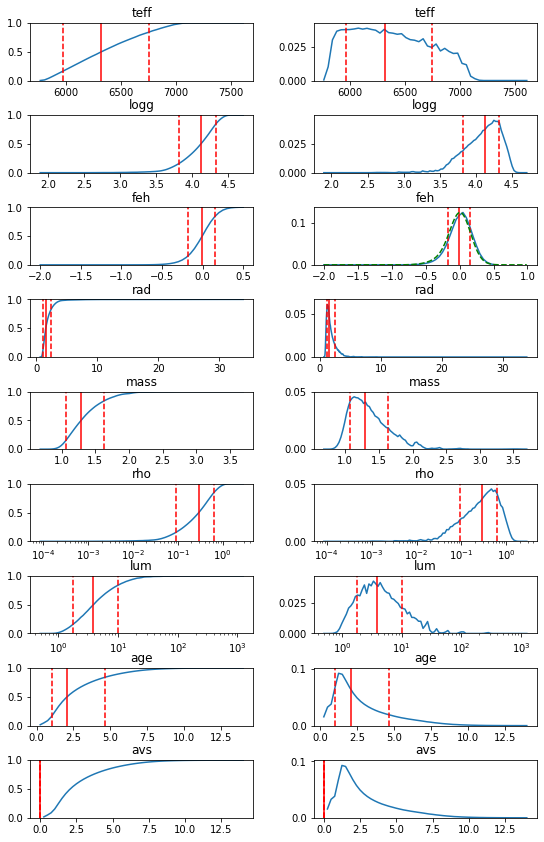

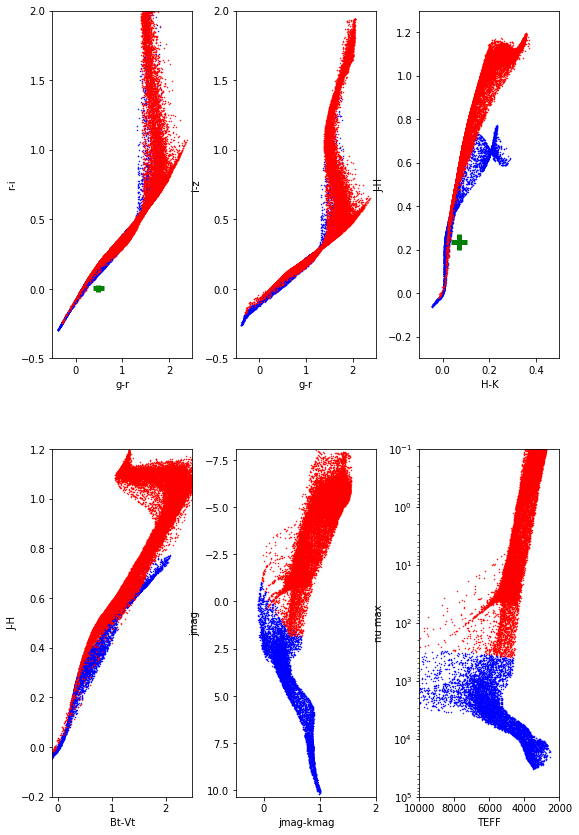

In [17]:
#paras,prob,figs=classify_grid.classify(input=x,model=,dustmodel=dustmodel,useav=av)

In [19]:
len(prob)

197183

In [30]:
paras.disep

0.0

In [27]:
col_names=['teff','teffep','teffem','logg','loggep','loggem','feh','fehep','fehem',
          'rad','radep','radem','mass','massep','massem','rho','rhoep','rhoem',
          'lum','lumep','lumem','avs','avsep','avsem','dis','disep','disem']#,'plx','plxep','plxem','mabs']
outputdf=pd.Series()
for c in col_names:
    exec('outputdf[\"'+c+'\"]=paras.'+c)
outputdf['prob']=np.average(prob[~np.isnan(prob)])


In [25]:
outputdf

teff      6322.525949
teffep     430.031496
teffem     352.432287
logg         4.119489
loggep       0.202861
loggem       0.303336
feh         -0.004507
fehep        0.155580
fehem        0.173022
rad          1.578429
radep        0.932305
radem        0.417101
mass         1.288622
massep       0.343731
massem       0.221157
rho          0.293288
rhoep        0.332140
rhoem        0.200800
lum          3.853841
lumep        6.206606
lumem        2.095349
avs          0.000000
avsep        0.000000
avsem        0.000000
dis          0.000000
disep        0.000000
disem        0.000000
prob       -30.880296
dtype: float64

(0.0001, 100000)

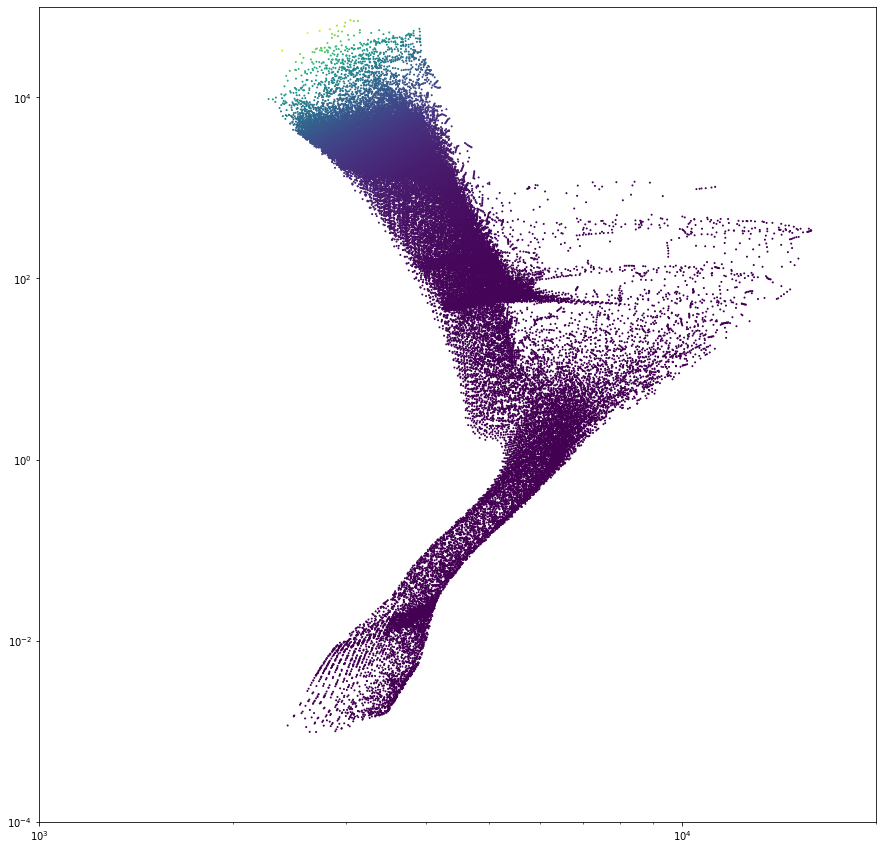

In [17]:
mod=LoadModel()
plt.figure(figsize=(15,15))
plt.scatter(mod['teff'][::48],mod['lum'][::48],c=mod['rad'][::48],s=1)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1000,20000)
plt.ylim(0.0001,100000)

In [29]:
rand=np.random.random(4)

In [47]:
print(rand)
print(list(np.sort(rand)).index(rand[2]))

[0.67376637 0.67266671 0.85382815 0.79782282]
3


In [48]:
ser=pd.Series({'this':2789})

In [49]:
ser.rename('newname')

this    2789
Name: newname, dtype: int64

2

In [64]:
exofop_dat,survey_dat,outputdf,paras = starpars(203311200,mission="k2",errboost=0.5,
                                                useGaiaLum=True,useGaiaBR=True,useBV=False,use2mass=True)

INFO: Query finished. [astroquery.utils.tap.core]
mission    k2
Name: 2_6043177967981728512, dtype: object
Querying catalogues. 0 of 4
b'Gaia DR2 6043177967981728512' <desig, id> 6043177967981728512
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
mission    k2
Name: 0_6043177972287365632, dtype: object
Querying catalogues. 1 of 4
b'Gaia DR2 6043177972287365632' <desig, id> 6043177972287365632
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
mission    k2
Name: 1_6043177972287457664, dtype: object
Querying catalogues. 2 of 4
b'Gaia DR2 6043177972287457664' <desig, id> 6043177972287457664
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INF

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [75]:
icid=167661160;mission="tess";errboost=0.15

useGaiaLum=True;useGaiaBR=True;useBV=False;use2mass=False;useGriz=False;useGaiaAg=True

exofop_dat=GetExoFop(icid,mission)
sc=SkyCoord(exofop_dat.RA.split(' ')[0],exofop_dat.Dec.split(' ')[0],unit=(u.hour,u.deg))
survey_dat=QueryGaiaAndSurveys(sc,mission=mission)

x=classify.obsdata()

x.addcoords(sc.ra.deg,sc.dec.deg)

if 'parallax' in survey_dat.index and survey_dat.parallax is not None:
    x.addplx(survey_dat.parallax/1000,survey_dat.parallax_error/1000)

if useGaiaLum and 'lum_val' in survey_dat.index:
    if not np.isnan((survey_dat.lum_val+survey_dat.lum_percentile_upper+survey_dat.lum_percentile_lower)):
        x.addlum([survey_dat.lum_val],[0.5*(survey_dat.lum_percentile_upper-survey_dat.lum_percentile_lower)])

if useGaiaBR and 'phot_g_mean_mag' in survey_dat.index and survey_dat.phot_g_mean_mag is not None:
    if not np.isnan(np.sum(survey_dat[['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag',
                                       'phot_g_mean_flux_over_error','phot_bp_mean_flux_over_error',
                                       'phot_rp_mean_flux_over_error']].values.astype(np.float64))):
        x.addgaia(survey_dat[['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag']].values.astype(np.float64),
              errboost+np.log(1.0+1.0/survey_dat[['phot_g_mean_flux_over_error',
                                          'phot_bp_mean_flux_over_error',
                                          'phot_rp_mean_flux_over_error']].values.astype(np.float64))*2.5)

if useBV and 'ap_Johnson B (B)' in survey_dat.index and not np.isnan(np.sum(survey_dat[['ap_Johnson B (B)','ap_Johnson V (V)','ap_Berr','ap_Verr']].values)):
    #BV photometry (eg apass)
    x.addbv([survey_dat['ap_Johnson B (B)'],survey_dat['ap_Johnson V (V)']],
            [errboost+survey_dat['ap_Berr'],errboost+survey_dat['ap_Verr']])
elif useBV and 'B' in exofop_dat.index and not np.isnan(np.sum(exofop_dat[['B','V','B_err','V_err']].values)):
    x.addbv([exofop_dat['B'],exofop_dat['V']],
            [errboost+exofop_dat['B_err'],errboost+exofop_dat['V_err']])

if use2mass and '2m_ks_m' in survey_dat.index and not np.isnan(np.sum(survey_dat[['2m_j_m','2m_h_m','2m_ks_m',
                                                                                 '2m_j_msigcom','2m_h_msigcom','2m_ks_msigcom']].values)):
    # 2MASS photometry
    x.addjhk([survey_dat['2m_j_m'],survey_dat['2m_h_m'],survey_dat['2m_ks_m']],
             [errboost+survey_dat['2m_j_msigcom'],errboost+survey_dat['2m_h_msigcom'],errboost+survey_dat['2m_ks_msigcom']])
elif use2mass and 'K' in exofop_dat.index  and not np.isnan(np.sum(survey_dat[['J','H','K',
                                                                               'J_err','H_err','K_err']].values)):
    x.addjhk([exofop_dat['J'],exofop_dat['H'],exofop_dat['K']],
             [errboost+exofop_dat['J_err'],errboost+exofop_dat['H_err'],errboost+exofop_dat['K_err']])


if useGriz and "ap_Sloan z' (SZ)" in survey_dat.index and not np.isnan(np.sum(survey_dat[["ap_Sloan g' (SG)","ap_Sloan r' (SR)","ap_Sloan i' (SI)","ap_Sloan z' (SZ)","ap_SGerr","ap_SRerr","ap_SIerr","ap_SZerr"]].values)):
    # 2MASS photometry
    x.addgriz([survey_dat["ap_Sloan g' (SG)"],survey_dat["ap_Sloan r' (SR)"],
               survey_dat["ap_Sloan i' (SI)"],survey_dat["ap_Sloan z' (SZ)"]],
             [errboost+survey_dat["ap_SGerr"],errboost+survey_dat["ap_SRerr"],
              errboost+survey_dat["ap_SIerr"],errboost+survey_dat["ap_SZerr"]])
elif useGriz and 'sd_z_mag' in survey_dat.index and not np.isnan(np.sum(survey_dat[["sd_g_mag","sd_r_mag","sd_i_mag","sd_z_mag","sd_g_mag_error","sd_r_mag_error","sd_i_mag_error","sd_z_mag_error"]].values)):
    x.addgriz([survey_dat['sd_g_mag'],survey_dat['sd_r_mag'],survey_dat['sd_i_mag'],survey_dat['sd_z_mag']],
              [errboost+survey_dat['sd_g_mag_error'],errboost+survey_dat['sd_r_mag_error'],
               errboost+survey_dat['sd_i_mag_error'],errboost+survey_dat['sd_z_mag_error']])
elif useGriz and 'z' in exofop_dat.index and not np.isnan(np.sum(exofop_dat[["g","r","i","z","g_err","r_err","i_err","z_err"]].values)):
    x.addgriz([exofop_dat['g'],exofop_dat['r'],exofop_dat['i'],exofop_dat['z']],
              [errboost+exofop_dat['g_err'],errboost+exofop_dat['r_err'],
               errboost+exofop_dat['i_err'],errboost+exofop_dat['z_err']])

if useGaiaAg and 'a_g_val' in survey_dat.index and survey_dat['a_g_val'] is not None:
    av=survey_dat['a_g_val']
else:
    av=-99

mod=LoadModel()

dustmodel,ext = LoadDust(sc,survey_dat.parallax/1000,dust='allsky')
#input, model, dustmodel=0, plot=1, useav=-99.0, ext=-99.0

INFO: Query finished. [astroquery.utils.tap.core]
mission    tess
Name: 0_4822523493384074496, dtype: object
Querying catalogues. 0 of 1
b'Gaia DR2 4822523493384074496' <desig, id> 4822523493384074496
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
<class 'dict'>


In [77]:
paras = classify.classify(input=x, model=mod, dustmodel=dustmodel, useav=av, ext=ext, plot=0)

col_names=['teff','teffep','teffem','logg','loggep','loggem','feh','fehep','fehem',
           'rad','radep','radem','mass','massep','massem','rho','rhoep','rhoem',
           'lum','lumep','lumem','avs','avsep','avsem','dis','disep','disem']#,'plx','plxep','plxem','mabs']
outputdf=pd.Series()
for c in col_names:
    exec('outputdf[\"'+c+'\"]=paras.'+c)

UnboundLocalError: local variable 'mape' referenced before assignment

INFO: Query finished. [astroquery.utils.tap.core]
mission    tess
Name: 0_4615605055826120448, dtype: object
Querying catalogues. 0 of 1
b'Gaia DR2 4615605055826120448' <desig, id> 4615605055826120448
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
<class 'dict'>
1.5291924476623535
[1.87678350e-02 1.87752150e-02 1.87825693e-02 ... 6.00728396e+03
 6.05274497e+03 6.09687585e+03]
lum 19718
number of models used within non-phot obsconstraints: 19718
INPUT: {'age': array([ 0.25,  0.25,  0.25, ..., 14.  , 14.  , 14.  ]), 'mass': array([0.30608167, 0.30615203, 0.3062223 , ..., 1.02584437, 1.02584437,
       1.02584437]), 'feh': array([-2. , -2. , -2. , ...,  0.5,  0.5,  0.5]), 'teff': array([4087.97202291, 4088.0355409 , 4088.0968299 , ..., 2615.66975446,
       2628.65075404, 2642.94436781]), 'logg': array([ 5.04971294,  5.049669  ,  5.049624

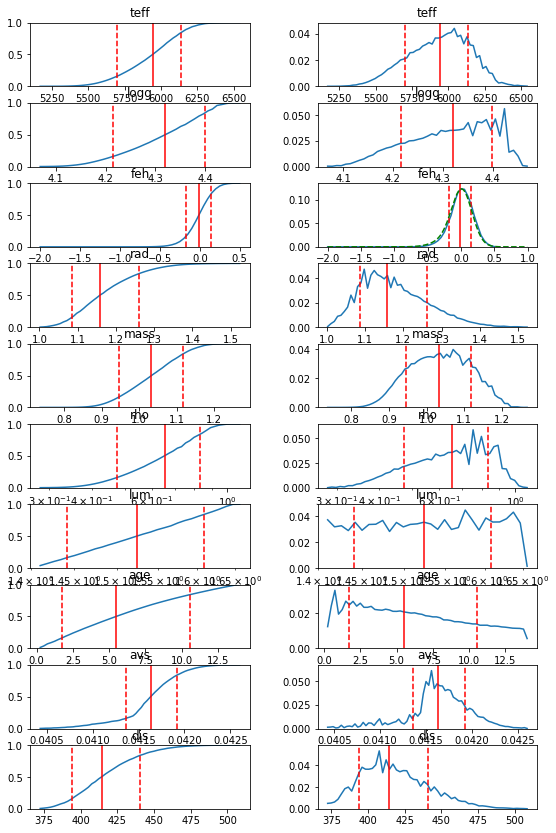

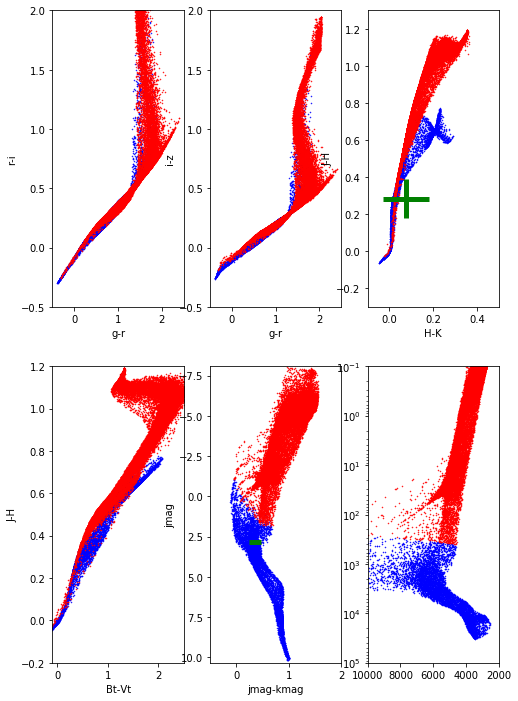

In [94]:
exofop_dat,survey_dat,outputdf,paras = starpars(394698182,mission="tess",errboost=0.05)

RA
Dec
Galactic Long
Galactic Lat
Ecliptic Long
Ecliptic Lat
Proper Motion RA (mas/yr)
Proper Motion Dec (mas/yr)
Star Name & Aliases
Planet Name(s)
In CTL
TIC Contamination Ratio
# of Contamination sources
['Telescope', 'Instrument', 'Teff (K)', 'Teff (K) Error', 'log(g)', 'log(g) Error', 'Radius (R_Sun)', 'Radius (R_Sun) Error', "logR'HK", "logR'HK Error", 'S-index', 'S-index Error', 'H-alpha', 'H-alpha Error', 'Vsini', 'Vsini Error', 'Rot Per', 'Rot Per Error', 'Metallicity', 'Metallicity Error', 'Mass (M_Sun)', 'Mass (M_Sun) Error', 'Density (g/cm^3)', 'Density (g/cm^3) Error', 'Luminosity', 'Luminosity Error', 'Observation Time (BJD)', 'RV (m/s)', 'RV Error', 'Distance (pc)', 'Distance (pc) Error', 'Date', 'User', 'Group', 'Tag', 'Notes']
INFO: Query finished. [astroquery.utils.tap.core]
mission    tess
Name: 0_6571502449115103232, dtype: object
Querying catalogues. 0 of 1
b'Gaia DR2 6571502449115103232' <desig, id> 6571502449115103232
INFO: Query finished. [astroquery.utils.tap.c

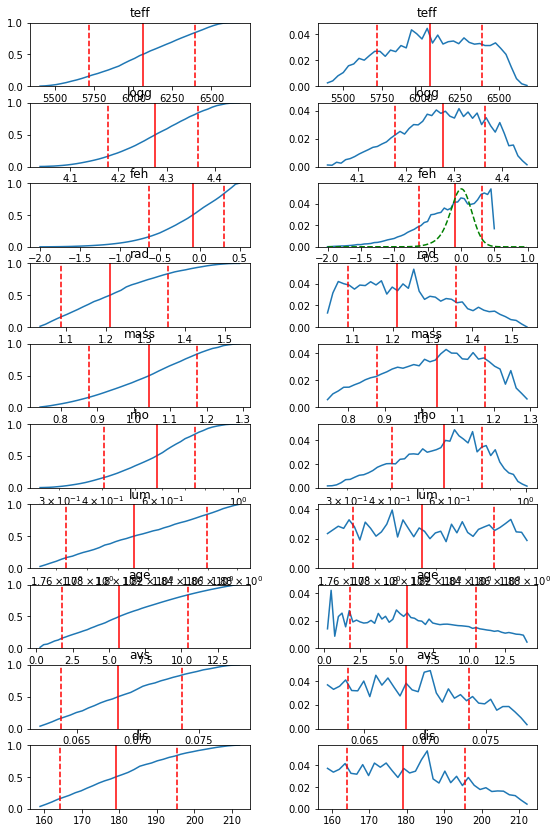

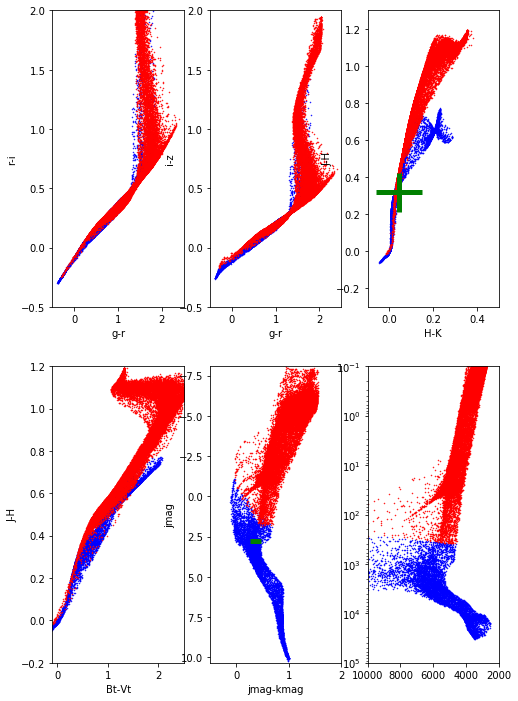

In [120]:
exofop_dat,survey_dat,outputdf,paras,best_df= starpars(207081058,mission="tess",errboost=0.05)
print(best_df)

In [119]:
col_names=['teff','teffep','teffem','logg','loggep','loggem','feh','fehep','fehem',
           'rad','radep','radem','mass','massep','massem','rho','rhoep','rhoem',
           'lum','lumep','lumem','avs','avsep','avsem','dis','disep','disem']


AttributeError: 'list' object has no attribute 'drop'

In [84]:
np.log(10)+np.log(1.5)

2.7080502011022105

In [85]:
np.log(15)

2.70805020110221

In [86]:
np.log(4*np.exp(5))

6.386294361119891

In [87]:
np.log(4)+5

6.386294361119891

RA
Dec
Gal Long
Gal Lat
Aliases
Campaign
Proposals
Object Type
['Parameter', 'Value', 'Uncertainty', 'User', 'Date', 'Notes']
INFO: Query finished. [astroquery.utils.tap.core]
mission    k2
Name: 0_636363799347569408, dtype: object
Querying catalogues. 0 of 1
b'Gaia DR2 636363799347569408' <desig, id> 636363799347569408
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
<class 'dict'>
2.340893268585205
[1.87678350e-02 1.87752150e-02 1.87825693e-02 ... 6.00728396e+03
 6.05274497e+03 6.09687585e+03]
teff 153629
lum 3354
feh 3354
number of models used within non-phot obsconstraints: 3354
number of models incl reddening: 3354
number of models after phot constraints: 3239
----
teff 6078.7631718255025 161.19622894568602 244.8398250618393
logg 4.199938887241807 0.08909398322275663 0.08747307192893494
feh 0.0939114476213198 0.24407058257350767 0.4

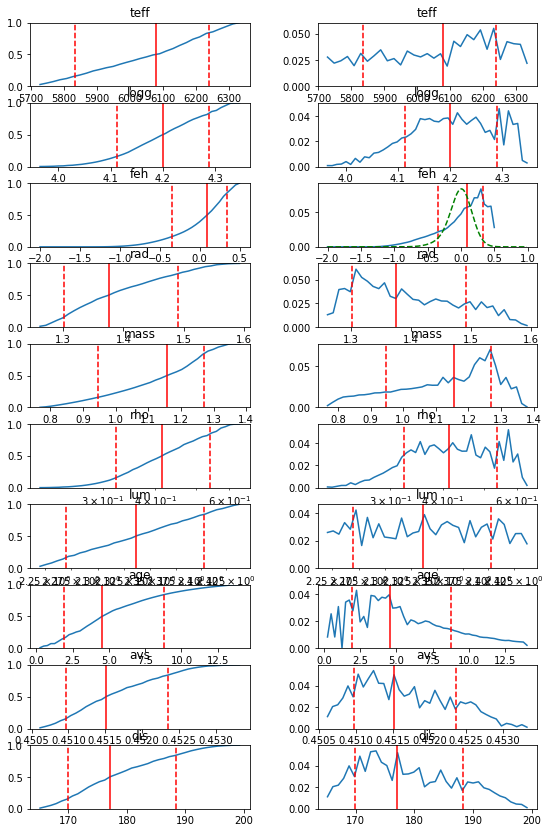

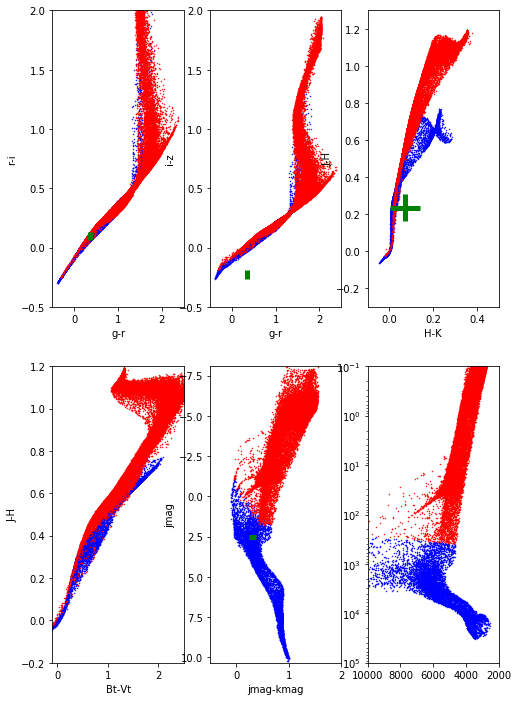

In [124]:
exofop_dat,survey_dat,outputdf,paras, best_df = starpars(211945201,mission="k2",errboost=0.025)

In [123]:
print(best_df)

Empty DataFrame
Columns: [teff, teffep, teffem, logg, loggep, loggem, feh, fehep, fehem, rad, radep, radem, mass, massep, massem, rho_gcm3, rho_gcm3ep, rho_gcm3em, lum, lumep, lumem, avs, avsep, avsem, dis, disep, disem, source]
Index: []

[0 rows x 28 columns]


In [125]:
exofop_dat

Aliases         2MASS J09061775+1924080,TYC 1404-1186-1, WISE ...
Campaign                                                     5,16
Density                                                 5.606e-01
Density_err                                             1.674e-01
Distance                                                1.655e+02
Distance_err                                            1.712e+01
FeH                                                        -0.022
FeH_err                                                     0.210
GalLat                                                  38.127689
GalLong                                                208.781799
Kep                                                        10.115
Kep_err                                                          
Mass                                                        1.141
Mass_err                                                    0.095
ObjectType                                                   STAR
Proposals 

In [126]:
df=pd.DataFrame.from_csv("/Users/hosborn/Postdoc/TESS/Monotransits/AllMonosSouth_2.csv")


In [145]:
df.loc[:,['ra','dec']].values

array([[315.330847  , -27.317436  ],
       [315.833687  , -25.909847  ],
       [ 65.238019  , -68.102664  ],
       ...,
       [208.27941596, -23.51323597],
       [161.0467102 , -59.87855494],
       [231.645892  , -27.943944  ]])

In [146]:
arr

array([[ 3.15330847e+02, -2.73174360e+01,  1.66666667e-01],
       [ 3.15833687e+02, -2.59098470e+01,  1.66666667e-01],
       [ 6.52380190e+01, -6.81026640e+01,  1.66666667e-01],
       ...,
       [ 2.08279416e+02, -2.35132360e+01,  1.66666667e-01],
       [ 1.61046710e+02, -5.98785549e+01,  1.66666667e-01],
       [ 2.31645892e+02, -2.79439440e+01,  1.66666667e-01]])

In [151]:
np.savetxt('/Users/hosborn/Postdoc/TESS/Monotransits/LAMOST_search_radec_all.csv',arr[~np.isnan(np.sum(arr,axis=1))],delimiter=',',header='ra,dec,radius')


In [150]:
arr=np.column_stack((df.loc[:,['ra','dec']].values,np.tile(10/60.,len(df))))#10 arcsec radius
for narr in range(9):
    sharr=arr[narr*100:np.clip((narr+1)*100,0,len(arr))]
    sharr=sharr[~np.isnan(np.sum(sharr,axis=1))]
    np.savetxt('/Users/hosborn/Postdoc/TESS/Monotransits/LAMOST_search_radec_'+str(narr)+'.csv',sharr,delimiter=',',header='ra,dec,radius')
    for row in np.arange(narr*100,np.clip((narr+1)*100,0,len(arr))):
        print("{:.5f},{:.5f},0.13".format(arr[row,0],arr[row,1]))
    print("----------")

315.33085,-27.31744,0.13
315.83369,-25.90985,0.13
65.23802,-68.10266,0.13
327.11613,-26.23538,0.13
327.63881,-26.55649,0.13
328.89610,-28.05060,0.13
73.98023,-63.26006,0.13
73.98023,-63.26006,0.13
336.29976,-34.68959,0.13
336.40231,-34.90962,0.13
312.52395,-33.24546,0.13
314.40760,-34.27180,0.13
315.27005,-34.96405,0.13
316.50332,-33.80339,0.13
321.61650,-23.64380,0.13
315.25938,-45.11595,0.13
345.63113,-46.08519,0.13
325.14769,-45.72825,0.13
329.23143,-35.35973,0.13
99.46065,-70.93263,0.13
327.07586,-37.55331,0.13
320.74107,-32.48810,0.13
331.75006,-31.69973,0.13
331.96567,-34.02390,0.13
38.88666,-71.62415,0.13
323.61899,-61.58281,0.13
84.29120,-80.46914,0.13
12.54118,-83.74396,0.13
311.84430,-25.78540,0.13
33.45832,-80.58281,0.13
328.81560,-66.09070,0.13
51.74676,-63.49915,0.13
321.10728,-29.24736,0.13
322.99110,-28.33797,0.13
122.08513,-61.97095,0.13
356.75084,-64.81651,0.13
119.38068,-61.24825,0.13
4.44641,-66.35899,0.13
312.14258,-28.09785,0.13
324.45521,-25.20057,0.13
335.67691,-

In [105]:
outputdf

teff      0.0
teffep    0.0
teffem    0.0
logg      0.0
loggep    0.0
loggem    0.0
feh       0.0
fehep     0.0
fehem     0.0
rad       0.0
radep     0.0
radem     0.0
mass      0.0
massep    0.0
massem    0.0
rho       0.0
rhoep     0.0
rhoem     0.0
lum       0.0
lumep     0.0
lumem     0.0
avs       0.0
avsep     0.0
avsem     0.0
dis       0.0
disep     0.0
disem     0.0
dtype: float64

In [73]:
2.5*np.log(np.array([1.0003422787643268,1.0011345868311061,1.0009019670191883]))

array([0.00085555, 0.00283486, 0.0022539 ])

In [28]:
exofop_dat[['B','V','J','H','K','B_err','V_err','J_err','H_err','K_err']]

B        10.937
V        10.154
J         9.144
H         8.908
K         8.837
B_err     0.080
V_err     0.056
J_err     0.023
H_err     0.028
K_err     0.020
Name: 211945201, dtype: object

In [26]:
exofop_dat

Aliases               2MASS J09061775+1924080,TYC 1404-1186-1, WISE ...
B                                                                10.937
BError                                                            0.080
Campaign                                                           5,16
Dec                                                         19:24:08.11
Density                                                       5.606e-01
DensityError                                                  1.674e-01
Distance                                                      1.655e+02
DistanceError                                                 1.712e+01
FeH                                                              -0.022
FeHError                                                          0.210
GalLat                                                        38.127689
GalLong                                                      208.781799
H                                                               

In [23]:
survey_dat[['ap_Johnson B (B)','ap_Johnson V (V)','2m_j_m','2m_h_m','2m_ks_m']]

ap_Johnson B (B)    10.727
ap_Johnson V (V)    10.169
2m_j_m               9.144
2m_h_m               8.908
2m_ks_m              8.837
Name: 0, dtype: object

In [21]:
exofop_dat.index

Index(['Aliases', 'B', 'BError', 'Campaign', 'Dec', 'Density', 'DensityError',
       'Distance', 'DistanceError', 'FeH', 'FeHError', 'GalLat', 'GalLong',
       'H', 'HError', 'J', 'JError', 'K', 'KError', 'Kep', 'KepError', 'Mass',
       'MassError', 'ObjectType', 'Proposals', 'RA', 'Radius', 'RadiusError',
       'Teff', 'TeffError', 'V', 'VError', 'WISE12micron', 'WISE12micronError',
       'WISE22micron', 'WISE22micronError', 'WISE3.4micron',
       'WISE3.4micronError', 'WISE4.6micron', 'WISE4.6micronError', 'g',
       'gError', 'i', 'iError', 'logg', 'loggError', 'mission', 'r', 'rError'],
      dtype='object')

In [24]:
survey_dat[[col for col in survey_dat.index if '2m' in col]]

2m_angular_distance                    0.0993874
2m_dec_2                                 19.4022
2m_err_maj                                  0.08
2m_err_min                                  0.07
2m_ext_key                                   NaN
2m_h_m                                     8.908
2m_h_msigcom                               0.028
2m_j_date                            2.45167e+06
2m_j_m                                     9.144
2m_j_msigcom                               0.023
2m_ks_m                                    8.837
2m_ks_msigcom                               0.02
2m_original_ext_source_id    b'09061775+1924080'
2m_ph_qual                                b'AAA'
2m_ra_2                                  136.574
2m_tmass_oid                         3.50919e+08
wise_w2mpro                                8.844
wise_w2mpro_error                           0.02
Name: 0, dtype: object

In [100]:
scols=['Telescope', 'Instrument', 'Teff (K)', 'Teff (K) Error', 'log(g)', 'log(g) Error', 'Radius (R_Sun)', 'Radius (R_Sun) Error', "logR'HK", "logR'HK Error", 'S-index', 'S-index Error', 'H-alpha', 'H-alpha Error', 'Vsini', 'Vsini Error', 'Rot Per', 'Rot Per Error', 'Metallicity', 'Metallicity Error', 'Mass (M_Sun)', 'Mass (M_Sun) Error', 'Density (g/cm^3)', 'Density (g/cm^3) Error', 'Luminosity', 'Luminosity Error', 'Observation Time (BJD)', 'RV (m/s)', 'RV Error', 'Distance (pc)', 'Distance (pc) Error', 'Date', 'User', 'Group', 'Tag', 'Notes']
cols={'Telescope':'telescope','Instrument':'instrument','Teff (K)':'teff','Teff (K) Error':'teffe','log(g)':'logg',
      'log(g) Error':'logge','Radius (R_Sun)':'srad','Radius (R_Sun) Error':'srade','logR\'HK':'logrhk',
      'logR\'HK Error':'logrhke','S-index':'sindex','S-index Error':'sindexe','H-alpha':'haplha','H-alpha Error':'halphae',
      'Vsini':'vsini','Vsini Error':'vsinie','Rot Per':'rot_per','Rot Per Error':'rot_pere','Metallicity':'feh',
      'Metallicity Error':'fehe','Mass (M_Sun)':'smass','Mass (M_Sun) Error':'smasse','Density (g/cm^3)':'rho_gcm3',
      'Density (g/cm^3) Error':'rho_gcm3e','Luminosity':'slum','Luminosity Error':'slume','Observation Time (BJD)':'obs_time_bjd',
      'RV (m/s)':'rv_ms','RV Error':'rv_mse','Distance (pc)':'sdist','Distance (pc) Error':'sdiste',
      '# of Contamination sources':'n_contams', 'B':'bmag', 'B Error':'bmage', 'Dec':'dec', 'Ecliptic Lat':'lat_ecl',
      'Ecliptic Long':'long_ecl', 'Gaia':'gmag', 'Gaia Error':'gmage', 'Galactic Lat':'lat_gal', 'Galactic Long':'long_gal',
      'H':'hmag', 'H Error':'hmage', 'In CTL':'in_ctl', 'J':'jmag', 'J Error':'jmage', 'K':'kmag', 'K Error':'kmage',
      'Planet Name(s)':'planet_names', 'Proper Motion Dec (mas/yr)':'pm_dec',
      'Proper Motion RA (mas/yr)':'pm_ra', 'RA':'ra', 'Star Name & Aliases':'star_name', 'TESS':'tmag',
      'TESS Error':'tmage', 'TIC Contamination Ratio':'ratio_contams', 'TOI':'toi', 'V':'vmag', 'V Error':'vmage',
      'WISE 12 micron':'w3mag', 'WISE 12 micron Error':'w3mage', 'WISE 22 micron':'w4mag',
      'WISE 22 micron Error':'w4mage', 'WISE 3.4 micron':'w1mag', 'WISE 3.4 micron Error':'w1mage',
      'WISE 4.6 micron':'w2mag', 'WISE 4.6 micron Error':'w2mag', 'n_TOIs':'n_tois'}

[scol in cols for scol in scols]


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False]

In [113]:
survey_dat.iloc[:60]

2m_angular_distance                                                          0.124465
2m_dec_2                                                                     -83.0886
2m_err_maj                                                                       0.06
2m_ext_key                                                                        NaN
2m_h_m                                                                         11.103
2m_h_msigcom                                                                    0.024
2m_j_date                                                                 2.45182e+06
2m_j_m                                                                         11.386
2m_j_msigcom                                                                    0.025
2m_ks_m                                                                        11.029
2m_original_ext_source_id                                         b'03395721-8305187'
2m_ph_qual                                            

In [108]:
survey_dat.iloc[60:120]

designation                     b'Gaia DR2 4615605055826120448'
e_bp_min_rp_percentile_lower                             0.1089
e_bp_min_rp_percentile_upper                             0.2301
e_bp_min_rp_val                                          0.1905
ecl_lat                                                -71.8088
ecl_lon                                                 282.776
epoch_photometry_url                                        NaN
flame_flags                                              200111
g_rp                                                   0.490133
l                                                       297.461
lum_percentile_lower                                    1.49859
lum_percentile_upper                                    1.55979
lum_val                                                 1.52919
matched_observations                                         21
mean_varpi_factor_al                                 -0.0658553
mission                                 

In [110]:
survey_dat.iloc[120:180]

teff_percentile_lower                          5695.5
teff_percentile_upper                            5812
teff_val                                      5768.25
visibility_periods_used                            15
wise_allwise_oid                          3.00421e+06
wise_angular_distance                       0.0361133
wise_cc_flags                                 b'00PP'
wise_dec_2                                   -83.0885
wise_dec_error_2                               0.0383
wise_original_ext_source_id    b'J033957.40-830518.7'
wise_ph_qual                                  b'AAAU'
wise_ra_2                                     54.9892
wise_ra_error_2                                0.0379
wise_radec_co_error                           -0.0102
wise_tmass_key                            1.16113e+09
wise_var_flag                                 b'22nn'
wise_w1gmag                                       NaN
wise_w1gmag_error                                 NaN
wise_w1mjd_mean             

In [104]:
GetExoFop(203311200,mission='k2')

RA
Dec
Gal Long
Gal Lat
Aliases
Campaign
Proposals
Object Type
['Parameter', 'Value', 'Uncertainty', 'User', 'Date', 'Notes']


Aliases         2MASS J16035433-2633133,2MASS J16035433-263313...
Campaign                                                        2
Density                                                    0.2066
Density_err                                                0.1781
Distance                                                    502.2
Distance_err                                                154.4
FeH                                                         0.073
FeH_err                                                       0.1
GalLat                                                  19.126268
GalLong                                                347.752106
Kep                                                        11.896
Kep_err                                                          
Mass                                                        1.535
Mass_err                                                      0.2
ObjectType                                                   STAR
Proposals 

In [13]:
survey_dat['ap_Verr']

0.054000000000000006

In [ ]:
survey_dat.parallax_error

# Strip ExoFop Data

In [271]:
def GetKICinfo(kic):
    #Getting Kepler stellar info from end-of-Kepler table:
    kicdat=pd.DataFrame.from_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=q1_q17_dr25_stellar&where=kepid=%27"+str(int(kic))+"%27")
    #kicdat=pd.DataFrame.from_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=keplerstellar&where=epic_number=%27"+str(int(kic))+"%27")
    if len(kicdat.shape)>1:
        kicdat=kicdat.iloc[0]
    kicdat['mission']='kepler'
    kicdat['id']=kicdat['kepid']
    return kicdat

In [286]:
GetKICinfo(8462852).index

Index(['kepid', 'tm_designation', 'ra', 'dec', 'kepmag', 'teff', 'teff_err1',
       'teff_err2', 'teff_prov', 'logg', 'logg_err1', 'logg_err2', 'logg_prov',
       'feh', 'feh_err1', 'feh_err2', 'feh_prov', 'radius', 'radius_err1',
       'radius_err2', 'mass', 'mass_err1', 'mass_err2', 'dens', 'dens_err1',
       'dens_err2', 'prov_sec', 'nconfp', 'nkoi', 'ntce', 'st_quarters',
       'st_vet_date_str'],
      dtype='object')

In [ ]:

        
'teff','teffep','teffem','logg','loggep','loggem','feh','fehep','fehem',
       'rad','radep','radem','mass','massep','massem','rho','rhoep','rhoem',
       'lum','lumep','lumem','avs','avsep','avsem','dis','disep','disem'

In [306]:
def GetExoFop(icid,mission='tess',file=''):
    #Strips online file for a given epic/tic
    if mission.lower() in ['kep','kepler']:
        return GetKICinfo(icid)
    assert mission.lower() in ['tess','k2']
    outdat={}
    outdat['mission']=mission.lower()
    req=requests.get("https://exofop.ipac.caltech.edu/"+mission.lower()+"/download_target.php?id="+str(icid), timeout=120)
    if req.status_code==200:
        #Splitting into each 'paragraph'
        sections=req.text.split('\n\n')
        for sect in sections:
            #Processing each section:
            if sect[:2]=='RA':
                print(sect[:10])
                #This is just general info - saving
                for line in sect.split('\n'):
                    outdat[re.sub('\ |\^|\/|\{|\}|\(|\)|\[|\]', '',line[:28])]=line[28:].strip()
            elif sect[:24]=='TESS Objects of Interest':
                print(sect[:10])
                #Only taking number of TOIs and TOI number:
                outdat['n_TOIs']=len(sect.split('\n'))-2
                outdat['TOI']=sect.split('\n')[2][:15].strip()
            elif sect[:7]=='STELLAR':
                print(sect[:10])
                #Stellar parameters
                labrow=sect.split('\n')[1]
                boolarr=np.array([s==' ' for s in labrow])
                splits=[0]+list(2+np.where(boolarr[:-3]*boolarr[1:-2]*~boolarr[2:-1]*~boolarr[3:])[0])+[len(labrow)]
                labs = [labrow[splits[i]:splits[i+1]] for i in range(len(splits)-1)]
                if mission.lower()=='tess':
                    #Going through all sources of Stellar params:
                    print(labs)
                    for row in sect.split('\n')[2:]:
                        stpars=np.array([row[splits[i]:splits[i+1]].strip() for i in range(len(splits)-1)])
                        for nl in range(len(labs)):
                            label=re.sub('\ |\/|\{|\}|\(|\)|\[|\]', '', labs[nl]).replace('Error','_err')
                            if not label in outdat.keys() and stpars[1]=='' and stpars[nl].strip()!='':
                                #Stellar info just comes from TIC, so saving simply:
                                outdat[label] = stpars[nl]
                            elif stpars[1]!='' and stpars[nl].strip()!='':
                                #Stellar info comes from follow-up, so saving with _INSTRUMENT:
                                outdat[label+'_'+stpars[1]] = stpars[nl]
                elif mission.lower()=='k2':
                    for row in sect.split('\n')[1:]:
                        label=re.sub('\ |\/|\{|\}|\(|\)|\[|\]', '', row[splits[0]:splits[1]])
                        print(label)
                        if not label in outdat.keys() and row[splits[3]:splits[4]].strip()=='huber':
                            outdat[label] = row[splits[1]:splits[2]].strip()
                            outdat[label+'_err'] = row[splits[2]:splits[3]].strip()
                        elif label in outdat.keys() and row[splits[3]:splits[4]].strip()!='huber':
                            if row[splits[3]:splits[4]].strip()!='macdougall':
                                #Adding extra stellar params with _user (no way to tell the source, e.g. spectra)
                                outdat[label+'_'+row[splits[3]:splits[4]].strip()] = row[splits[1]:splits[2]].strip()
                                outdat[label+'_err'+'_'+row[splits[3]:splits[4]].strip()] = row[splits[2]:splits[3]].strip()

            elif sect[:9]=='MAGNITUDE':
                print(sect[:10])
                labrow=sect.split('\n')[1]
                boolarr=np.array([s==' ' for s in labrow])
                splits=[0]+list(2+np.where(boolarr[:-3]*boolarr[1:-2]*~boolarr[2:-1]*~boolarr[3:])[0])+[len(labrow)]
                for row in sect.split('\n')[2:]:
                    label=re.sub('\ |\/|\{|\}|\(|\)|\[|\]', '', row[splits[0]:splits[1]])
                    outdat[label] = row[splits[1]:splits[2]].strip()
                    outdat[label+'Error'] = row[splits[2]:splits[3]].strip()
        return pd.Series(outdat,name=icid)
    else:
        return None


In [325]:
out2=GetExoFop(211945201,mission='K2')

RA        
MAGNITUDES
STELLAR PA
Parameter
Teff
logg
Radius
FeH
Distance
Mass
Density
Teff
logg
Radius
FeH
Distance
Mass
Density
Teff
logg


In [328]:
out2

Aliases2MASSJ09061775      +1924080,TYC 1404-1186-1, WISE J090617.78+1924...
B                                                                     10.937
BError                                                                 0.080
Campaign5,16                                                                
Dec19:24:08.11                                                              
Density                                                            5.606e-01
DensityError                                                       1.674e-01
Distance                                                           1.655e+02
DistanceError                                                      1.712e+01
FeH                                                                   -0.022
FeHError                                                               0.210
GalLat38.127689                                                             
GalLong208.781799                                                           

In [322]:
out

2m_angular_distance                         0.0993874
2m_dec_2                                      19.4022
2m_err_maj                                       0.08
2m_err_min                                       0.07
2m_ext_key                                        NaN
2m_h_m                                          8.908
2m_h_msigcom                                    0.028
2m_j_date                                 2.45167e+06
2m_j_m                                          9.144
2m_j_msigcom                                    0.023
2m_ks_m                                         8.837
2m_ks_msigcom                                    0.02
2m_original_ext_source_id         b'09061775+1924080'
2m_ph_qual                                     b'AAA'
2m_ra_2                                       136.574
2m_tmass_oid                              3.50919e+08
a_g_percentile_lower                           0.1586
a_g_percentile_upper                           0.4895
a_g_val                     

In [231]:
'some {$weird} (string)'.translate(None," (){}[]/")

TypeError: translate() takes exactly one argument (2 given)

In [225]:
icid=52368076
print(requests.get("https://exofop.ipac.caltech.edu/tess/download_target.php?id="+str(icid), timeout=120).text)

TIC ID 52368076

RA                          01:34:22.42  23.593425
Dec                         -66:40:34.86  -66.676349
Galactic Long               296.3572
Galactic Lat                -49.90068
Ecliptic Long               328.785
Ecliptic Lat                -64.89663
Proper Motion RA (mas/yr)   -119.8 +/- 0.066193
Proper Motion Dec (mas/yr)  -122.953 +/- 0.080023
Star Name & Aliases         TIC 52368076, TYC 8856-00192-1, UCAC4 117-001336, 2MASS J01342273-6640328, WISE J013422.50-664034.2, APASS 32403378
Planet Name(s)              N/A
In CTL                      Yes
TIC Contamination Ratio     0.000856
# of Contamination sources  67

TESS Objects of Interest (3)
TOI                 TIC                 Master pri  SG1A pri  SG1B pri  SG2 pri   SG3 pri   SG4 pri   SG5 pri   ACWG pri  TESS Disposition  TFOPWG Disposition  # Planet Cands  Source    Sectors                       Date Mod             Comments          
125.01              52368076.01         1           5         5       

In [220]:
import requests
mission='tess'
icid=42054565
req1=requests.get("https://exofop.ipac.caltech.edu/"+mission+"/download_target.php?id="+str(icid), timeout=120)


In [248]:
mission='k2'
icid=210693462
req2=requests.get("https://exofop.ipac.caltech.edu/"+mission+"/download_target.php?id="+str(icid), timeout=120)


In [222]:
print(req1.text)

TIC ID 42054565

RA                          01:36:40.41  24.168388
Dec                         -36:24:50.44  -36.414011
Galactic Long               259.8036
Galactic Lat                -76.65307
Ecliptic Long               5.14998
Ecliptic Lat                -42.50768
Proper Motion RA (mas/yr)   -55.9234 +/- 0.038331
Proper Motion Dec (mas/yr)  -81.7786 +/- 0.038487
Star Name & Aliases         TIC 42054565, TYC 7005-01138-1, UCAC4 268-001652, 2MASS J01364049-3624491, WISE J013640.43-362450.0, APASS 17477379
Planet Name(s)              N/A
In CTL                      Yes
TIC Contamination Ratio     0.007007
# of Contamination sources  38

TESS Objects of Interest (1)
TOI                 TIC                 Master pri  SG1A pri  SG1B pri  SG2 pri   SG3 pri   SG4 pri   SG5 pri   ACWG pri  TESS Disposition  TFOPWG Disposition  # Planet Cands  Source    Sectors                       Date Mod             Comments          
280.01              42054565.01         1           4         1     

In [96]:
survey_dat

2m_angular_distance                          0.124465
2m_dec_2                                     -83.0886
2m_err_maj                                       0.06
2m_ext_key                                        NaN
2m_h_m                                         11.103
2m_h_msigcom                                    0.024
2m_j_date                                 2.45182e+06
2m_j_m                                         11.386
2m_j_msigcom                                    0.025
2m_ks_m                                        11.029
2m_original_ext_source_id         b'03395721-8305187'
2m_ph_qual                                     b'AAA'
2m_ra_2                                       54.9884
2m_tmass_oid                                   865646
a_g_percentile_lower                           0.2273
a_g_percentile_upper                           0.4791
a_g_val                                         0.401
ap_Berr                                         0.044
ap_Dec (deg)                

In [97]:
exofop_dat

#ofContaminationsources                  108
B                                     13.267
B_err                                  0.022
Date                              2019-04-15
Dec                             -83:05:18.66
Densitygcm3                         0.604523
Densitygcm3_err                     0.127806
Distancepc                           428.915
Distancepc_err                          5.21
EclipticLat                         -71.8087
EclipticLong                        282.7765
Gaia                                 12.4077
Gaia_err                            0.000211
GalacticLat                        -32.14724
GalacticLong                        297.4612
Group                                 tfopwg
H                                     11.103
H_err                                  0.024
InCTL                                    Yes
J                                     11.386
J_err                                  0.025
K                                     11.029
K_err     

In [332]:
len('RA                          01:36:40.41  ')

41

In [ ]:
from itertools import accumulate, groupby

In [215]:
boolarr=np.array([s==' ' for s in req1.text.split('\n')[17]])
splits=[0]+list(2+np.where(boolarr[:-3]*boolarr[1:-2]*~boolarr[2:-1]*~boolarr[3:])[0])+[len(req1.text.split('\n')[17])]
labs = [req1.text.split('\n')[17][splits[i]:splits[i+1]] for i in range(len(splits)-1)]

In [216]:
out

['Telescope                ',
 'Instrument        ',
 'Teff (K)              ',
 'Teff (K) Error        ',
 'log(g)                ',
 'log(g) Error          ',
 'Radius (R_Sun)        ',
 'Radius (R_Sun) Error  ',
 "logR'HK               ",
 "logR'HK Error         ",
 'S-index               ',
 'S-index Error         ',
 'H-alpha               ',
 'H-alpha Error         ',
 'Vsini                 ',
 'Vsini Error           ',
 'Rot Per               ',
 'Rot Per Error         ',
 'Metallicity           ',
 'Metallicity Error     ',
 'Mass (M_Sun)          ',
 'Mass (M_Sun) Error    ',
 'Density (g/cm^3)      ',
 'Density (g/cm^3) Error   ',
 'Luminosity            ',
 'Luminosity Error      ',
 'Observation Time (BJD)   ',
 'RV (m/s)              ',
 'RV Error              ',
 'Distance (pc)         ',
 'Distance (pc) Error   ',
 'Date                  ',
 'User                  ',
 'Group             ',
 'Tag               ',
 'Notes             ']

In [330]:
len("RA           ")

13

In [249]:
print(req2.text)

EPIC ID 210693462

RA           03:41:46.43
Dec          18:16:08.05
Gal Long     169.998642
Gal Lat      -28.640720
Aliases      2MASS J03414639+1816082,2MASS J03414639+1816082
Campaign     4
Proposals    GO4020_LC, GO4060_LC, GO4011_LC, GO4109_LC
Object Type  STAR

MAGNITUDES:
Band              Value         Uncertainty         User                Date                   Notes
B                 15.423        0.030               EPIC                2015-04-09 12:34:41                        
g                 14.711        0.010               EPIC                2015-04-09 12:34:41                        
V                 13.868        0.120               EPIC                2015-04-09 12:34:41                        
r                 13.286        0.090               EPIC                2015-04-09 12:34:41                        
Kep               13.105                            EPIC                2015-04-09 12:34:41                        
i                 12.417        0.250  

In [ ]:
'''RA                          04:15:25.83  63.857632
Dec                         -16:54:07.72  -16.902144
Galactic Long               211.7127
Galactic Lat                -41.9505
Ecliptic Long               57.91351
Ecliptic Lat                -37.47424
Proper Motion RA (mas/yr)   47.5511 +/- 0.053524
Proper Motion Dec (mas/yr)  -30.7467 +/- 0.053144
Star Name & Aliases         TIC 70887357, TYC 5883-01412-1, UCAC4 366-005111, 2MASS J04152577-1654073, WISE J041525.81-165407.6, APASS 7549657
Planet Name(s)              N/A
In CTL                      Yes
TIC Contamination Ratio     0.000449
# of Contamination sources  37
'''

'''RA           16:03:54.33
Dec          -26:33:13.51
Gal Long     347.752106
Gal Lat      19.126268
Aliases      2MASS J16035433-2633133,2MASS J16035433-2633133, TYC 6788-215-1, WISE J160354.35-263313.4
Campaign     2
Proposals    GO2054_LC, GO2081_LC, GO2104_LC
Object Type  STAR
'''

In [296]:
def GetExoFop(icid,mission='tess',file=''):
    #Strips online file for a given epic/tic
    if mission.lower() in ['kep','kepler']:
        return GetKICinfo(icid)
    assert mission.lower() in ['tess','k2']
    
    req=requests.get("https://exofop.ipac.caltech.edu/"+mission.lower()+"/download_target.php?id="+str(icid), timeout=120)
    if not req.status_code==200:
        print("CANNOT ACCESS: https://exofop.ipac.caltech.edu/"+mission.lower()+"/download_target.php?id="+str(icid))
    else:
        catfile=req.text
        outdat={}
        #Sections split by double line breaks:
        catsplit=catfile.split('\n')
        MAG=-1000;mags=[]
        STPS=-1000;stpars=[]
        Aliases=[]
        splits=[]
        
        for row in catsplit:
            print(row[:15])
            row=str(row)
            if row=='':
                pass
            elif row[0:7]=='Proposa':
                a=row[13:].replace(' ','')
                outdat['K2_Proposal']=a
            elif row[0:7]=='Aliases':
                a=row[13:].split(',')
                for n in range(len(a)):
                    outdat['ALIAS'+str(n)]=a[n]
            elif row[0:8]=='Campaign':
                outdat['camp']=row[13:].split(',') #list of camps
            elif row[0:2]=='RA':
                outdat['RA']=row[13:30].replace(' ','')
            elif row[0:3]=='Dec':
                outdat['Dec']=row[13:30].replace(' ','')
            elif row.replace(' ','')=='MAGNITUDES:':
                MAG=0
            elif row.replace(' ','')=='STELLARPARAMETERS:':
                #For TESS here, we have a horizontal dictionary:
                if mission=='tess' and splits==[]:
                    STPS=-1000
                    #No splits yet means we have the labels:
                    boolarr=np.array([s==' ' for s in req1.text.split('\n')[17]])
                    splits=[0]+list(2+np.where(boolarr[:-3]*boolarr[1:-2]*~boolarr[2:-1]*~boolarr[3:])[0])+[len(req1.text.split('\n')[17])]
                    labs = [row[splits[i]:splits[i+1]].strip() for i in range(len(splits)-1)]
                elif mission=='tess':
                    STPS=-1000
                    #We have splits, so this is info
                    stpars+=[[row[splits[i]:splits[i+1]].strip() for i in range(len(splits)-1)]]
                else:
                    MAG=-1000;STPS=0
            elif row=='2MASS NEARBY STARS:':
                #Dont check for stellar parameters of magnitudes (i.e. do nothing)
                STPS=-1000;MAG=-1000
            elif row=='WISE NEARBY STARS:':
                #Dont check for stellar parameters of magnitudes (i.e. do nothing)
                STPS=-1000;MAG=-1000
            elif row.replace(' ','')=='SPECTROSCOPY:':
                STPS=-1000
                outdat['Notes']='fu_spectra'
            if MAG>1 and row!='':
                a=row[18:50].split()
                nom=row[0:17].replace(' ','')
                outdat[nom]=float(a[0])
                if len(a)>2: outdat[nom+'_ERR']=float(a[1])
            if STPS>1 and row!='':
                a=row[16:50].split()
                nom=str(row[0:16]).translate(None, " (){}[]/")
                nom='ExoFOP_ST_'+nom[:4]
                if nom in outdat.columns: nom=nom+'_2'
                outdat[nom]=float(a[0])
                if len(a)>2: outdat[nom+'_ERR']=float(a[1])
            MAG+=1;STPS+=1
            
        #Saving TESS stellar parameters:
        if stpars!=[]:
            if len(stpars)>1:
                insts=[stpars[n][2] for n in len(stpars)]
                if (insts!='').any():
                    #Telescope/Instrument specified: likely not just TIC v8 and Exofast.
                    for inst in np.unique(insts):
                        for nl in range(len(labs)):
                            if inst=='':
                                #Stellar info just comes from TIC, so saving simply:
                                outdat[labs[nl]] = stpars[insts.index(inst)][nl]
                            else:
                                #Stellar info comes from follow-up, so saving with _INSTRUMENT:
                                outdat[labs[nl]+'_'+inst] = stpars[insts.index(inst)][nl]
                else:
                    stpars=stpars[0]
            #Stellar info just comes from TIC, so saving simply:
            for nl in range(len(labs)):
                outdat[labs[nl]] = stpars[nl]
        return pd.Series(outdat,name=int(icid))

In [175]:
df_out=QueryGaiaAndSurveys(sc,5*u.arcsec)

INFO: Query finished. [astroquery.utils.tap.core]
https://www.aavso.org/cgi-bin/apass_dr10_download.pl?ra=63.8576&dec=-16.9021&radius=0.0014&output=csv
Querying catalogues. 0 of 1
b'Gaia DR2 5096613016130459136' <desig, id> 5096613016130459136
(96,)
RA (deg)           63.857532
RA err (")          0.194000
Dec (deg)         -16.902095
Dec err (")         0.262000
Johnson V (V)       9.331000
Verr                0.183000
Vnobs               3.000000
Johnson B (B)      10.030000
Berr                0.093000
Bnobs               6.000000
Sloan u' (SU)            NaN
SUerr                    NaN
SUnobs              0.000000
Sloan g' (SG)       9.913000
SGerr               0.308000
SGnobs              5.000000
Sloan r' (SR)       9.019000
SRerr               0.074000
SRnobs              2.000000
Sloan i' (SI)       8.961000
SIerr               0.080000
SInobs              2.000000
Sloan z' (SZ)       8.834000
SZerr               0.045000
SZnobs              2.000000
PanSTARRS Y (Y)          

In [176]:
df_out

2m_angular_distance                          0.157611
2m_dec_2                                      -16.902
2m_err_ang                                         90
2m_err_maj                                       0.07
2m_ext_key                                        NaN
2m_h_m                                          7.651
2m_h_msigcom                                     0.04
2m_j_date                                 2.45113e+06
2m_j_m                                          8.024
2m_j_msigcom                                     0.02
2m_ks_m                                          7.58
2m_ks_msigcom                                   0.016
2m_original_ext_source_id         b'04152577-1654073'
2m_ph_qual                                     b'AAA'
2m_ra_2                                       63.8574
2m_tmass_oid                              2.35316e+08
a_g_percentile_lower                              NaN
a_g_percentile_upper                              NaN
a_g_val                     

In [163]:
job_2m.get_results().to_pandas()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,err_min,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date
0,1635721458409799680,b'Gaia DR2 5096613016130459136',5096613016130459136,1444901604,2015.5,63.857632,0.026406,-16.902144,0.026158,7.154616,...,0.07,90,8.024,0.02,7.651,0.04,7.58,0.016,NaN,2.451134e+06


In [165]:
job_wise.get_results().to_pandas()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,w4mjd_mean,w1gmag,w1gmag_error,w2gmag,w2gmag_error,w3gmag,w3gmag_error,w4gmag,w4gmag_error,tmass_key
0,1635721458409799680,b'Gaia DR2 5096613016130459136',5096613016130459136,1444901604,2015.5,63.857632,0.026406,-16.902144,0.026158,7.154616,...,55238.479059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145750568


# Scrape 2MASS JHK colours given RA/Dec (from Gaia X-match?)

In [ ]:
def QueryGaia_fromID(id,dr=2,file=None):
    print("GAIA ID:",id)
    job = Gaia.launch_job_async("SELECT * \
        FROM gaiadr"+str(dr)+".gaia_source \
        WHERE gaiadr"+str(dr)+".gaia_source.source_id="+str(id),verbose=False)
    print("SELECT * FROM gaiadr"+str(dr)+".gaia_source WHERE gaiadr"+str(dr)+".gaia_source.source_id="+str(id))

    alldat=pd.concat([job.get_results().to_pandas(),job_2m.get_results().to_pandas(),job_sd.get_results().to_pandas(),
             job_ur.get_results().to_pandas(),job_wise.get_results().to_pandas()],axis=1)

    cats=['gaia','2mass','sdss','URAT1','WISE']
    jobs=[job.get_results(),job_2m.get_results(),job_sd.get_results(),job_ur.get_results(),job_wise.get_results()]

    print(str(alldat.shape)," dic created with data from ",','.join([cats[i] if len(jobs[i])>0 else "" for i in range(5)]))
    if file is not None:
        alldat.to_csv(file)
    return alldat,jobs

In [3]:
import importlib.util
spec = importlib.util.spec_from_file_location("isoclassify", "/Users/hosborn/python")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
foo.MyClass()

AttributeError: 'NoneType' object has no attribute 'loader'

In [ ]:
import pandas as pd

def KeplerDat(kic):
    return pd.read_csv('http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?&table=keplerstellar&where=KepID='+str(kic)+'&format=csv&order=st_vet_date_str%20desc')

# Check SDSS:


In [152]:
from astroquery.sdss import SDSS

In [156]:
for row in df.iterrows():
    xid = SDSS.query_region(SkyCoord(row[1]['ra']*u.deg,row[1]['dec']*u.deg), spectro=True)
    if xid is not None:
        print(xid)

       ra               dec               objid        ... run2d instrument
---------------- ----------------- ------------------- ... ----- ----------
53.3349773430318 0.122406734861568 1237663238740377658 ...    26       SDSS
53.3349773430318 0.122406734861568 1237663238740377658 ...    26       SDSS


ValueError: Some errors were detected !
    Line #63 (got 4 columns instead of 1)
    Line #125 (got 2 columns instead of 1)
    Line #126 (got 2 columns instead of 1)
    Line #132 (got 2 columns instead of 1)
    Line #133 (got 3 columns instead of 1)
    Line #134 (got 2 columns instead of 1)
    Line #136 (got 4 columns instead of 1)
    Line #137 (got 2 columns instead of 1)
    Line #140 (got 2 columns instead of 1)

In [159]:
xid is None

True

In [160]:
xid = SDSS.query_region(, spectro=True)

In [163]:
radecs=SkyCoord(df['ra'].values*u.deg,df['dec'].values*u.deg)

In [167]:
radecs

<SkyCoord (ICRS): (ra, dec) in deg
    [(3.15330847e+02, -2.73174360e+01), (3.15833687e+02, -2.59098470e+01),
     (6.52380190e+01, -6.81026640e+01), (3.27116127e+02, -2.62353750e+01),
     (3.27638812e+02, -2.65564890e+01), (3.28896100e+02, -2.80506000e+01),
     (7.39802310e+01, -6.32600630e+01), (7.39802310e+01, -6.32600630e+01),
     (3.36299762e+02, -3.46895910e+01), (3.36402307e+02, -3.49096230e+01),
     (3.12523945e+02, -3.32454560e+01), (3.14407600e+02, -3.42718000e+01),
     (3.15270052e+02, -3.49640460e+01), (3.16503322e+02, -3.38033880e+01),
     (3.21616500e+02, -2.36438000e+01), (3.15259384e+02, -4.51159470e+01),
     (3.45631132e+02, -4.60851940e+01), (3.25147689e+02, -4.57282490e+01),
     (3.29231426e+02, -3.53597300e+01), (9.94606530e+01, -7.09326280e+01),
     (3.27075857e+02, -3.75533140e+01), (3.20741066e+02, -3.24881020e+01),
     (3.31750063e+02, -3.16997280e+01), (3.31965673e+02, -3.40239010e+01),
     (3.88866630e+01, -7.16241470e+01), (3.23618992e+02, -6.15828

In [164]:
SkyCoord(53.3349773430318*u.deg, 0.122406734861568*u.deg).match_to_catalog_sky(radecs)

(array(276), <Angle [56.42426835] deg>, <Quantity 0.9454748>)

In [170]:
np.nanargmin((radecs.ra.deg-53.3349773430318)**2+(radecs.dec.deg-0.122406734861568)**2)

138

In [173]:
sc=SkyCoord("15:21:48 -48:19:03",unit=(u.deg))

In [176]:
from astropy import coordinates
sc.transform_to(coordinates.GeocentricMeanEcliptic)

<SkyCoord (GeocentricMeanEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, )
    (348.07102479, -49.05528562, 1.)>

In [178]:
best_df.columns

Index(['teff', 'teffep', 'teffem', 'logg', 'loggep', 'loggem', 'feh', 'fehep',
       'fehem', 'rad', 'radep', 'radem', 'mass', 'massep', 'massem',
       'rho_gcm3', 'rho_gcm3ep', 'rho_gcm3em', 'lum', 'lumep', 'lumem', 'avs',
       'avsep', 'avsem', 'dis', 'disep', 'disem', 'source'],
      dtype='object')

In [171]:
df.iloc[138]

ID                                                               453828065
TOI                                                                      0
sector                                                                   4
GAIAmag                                                            16.3774
ra                                                                 53.3348
dec                                                               0.122503
per                                                                 34.073
tcen                                                               1413.71
Rp                                                                 16.2833
dur                                                                0.29792
score                                                                    2
hugh_flag                                                               P2
hugh_notes                Star Rs unknown but possible Mdwarf. V-shaped...
notes                    

In [155]:
print(xid)

None
